In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("ggplot")
%matplotlib inline

In [29]:
columns = [
    "lat",
    "lon",
    "id",
    "title",
#     "notes",
    "start_ts",
    "report_type",
    "severity",
    "lat_long",
    "severity_score",
    "city",
    "anomalous"
]

In [32]:
df = pd.read_csv("data/flagged_reports.csv", header=None)
df = df.drop(0, axis=1)
df.columns = columns
df = df.sort_values("start_ts")
print df.head()

         lat        lon                      id  \
16  31.68237   65.75953  eEVURH7A5hGIDxrRy13KCQ   
18  19.07283   72.88261  ACW5co3A5hGCSKQCZNc2RA   
19  -6.21462  106.84513  PhGtZ47A5hGFZBzRy13KCQ   
20  37.56600  126.97840  yMRHPo_A5hGSHRzRy13KCQ   
23  33.67927  -84.27187  DvOpKpXA5hGHLBvRy13KCQ   

                                                title             start_ts  \
16  Maoist couple surrender due to ill-health and ...  2016-12-12 15:18:42   
18      Women staff harassment in DGCA going unheard?  2016-12-12 17:07:22   
19   Indonesian police arrest 4 in a failed bomb plot  2016-12-12 17:14:13   
20     Doosan Heavy bags 160 bln-won order from Egypt  2016-12-12 17:20:13   
23                            Ayurvedic resort opened  2016-12-12 18:02:37   

         report_type  severity                                   lat_long  \
16  Physical Threats  moderate   (31.682370000000002, 65.759529999999998)   
18             Other  moderate                       (19.07283, 72.882

In [37]:
berlin_df = df[df["city"] == "Berlin"]
berlin_df = berlin_df.set_index("start_ts")
print berlin_df.info()
print berlin_df.head(5)

<class 'pandas.core.frame.DataFrame'>
Index: 169 entries, 2016-12-18 12:09:07 to 2016-12-24 02:04:41
Data columns (total 10 columns):
lat               169 non-null float64
lon               169 non-null float64
id                169 non-null object
title             169 non-null object
report_type       169 non-null object
severity          169 non-null object
lat_long          169 non-null object
severity_score    169 non-null int64
city              169 non-null object
anomalous         169 non-null float64
dtypes: float64(3), int64(1), object(6)
memory usage: 14.5+ KB
None
                           lat       lon                      id  \
start_ts                                                           
2016-12-18 12:09:07  52.524370  13.41053  7uX7xhrF5hGDCCPRy13KCQ   
2016-12-19 00:00:00  52.504884  13.33537  0AX05CnG5hGH_CrRy13KCQ   
2016-12-19 00:00:00  52.504884  13.33537  cipqGSfG5hGFwUMO+RcZ4Q   
2016-12-19 00:00:00  52.504884  13.33537  Dvc79yzG5hGrfkcO+RcZ4Q   
2016-12-

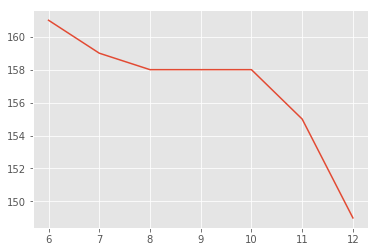

In [62]:
next_day = pd.Timedelta(days=1)

cutoffs = xrange(6, 13)
num_critical = []
for cutoff in cutoffs:
    lst = []
    for row in berlin_df.iterrows():
        report_time = pd.to_datetime(row[0])
        stop_time = min(report_time+next_day, pd.to_datetime(max(berlin_df.index)))
        future_reports = berlin_df[str(report_time):str(stop_time)]
        if len(future_reports) >= cutoff:
            lst.append(1)

    num_critical.append(sum(lst))
#     print "Number of reports deemed anomalous: ", len(berlin_df)
#     print "Number of reports deemed critical: ", sum(lst)

plt.plot(cutoffs, num_critical)

In [74]:
def plot_cutoffs_to_critical_reports(ax, city_df, cutoffs=xrange(1, 51)):
    next_day = pd.Timedelta(days=1)
    num_critical = []
    for cutoff in cutoffs:
        lst = []
        for row in city_df.iterrows():
            report_time = pd.to_datetime(row[0])
            stop_time = min(report_time+next_day, pd.to_datetime(max(berlin_df.index)))
            future_reports = city_df[str(report_time):str(stop_time)]
            if len(future_reports) >= cutoff:
                lst.append(1)

        num_critical.append(sum(lst))

    ax.plot(cutoffs, num_critical)
    ax.set_xlabel("Cutoff")
    ax.set_ylabel("Num Critical")
    ax.set_title(city_df.iloc[0,-2])
    

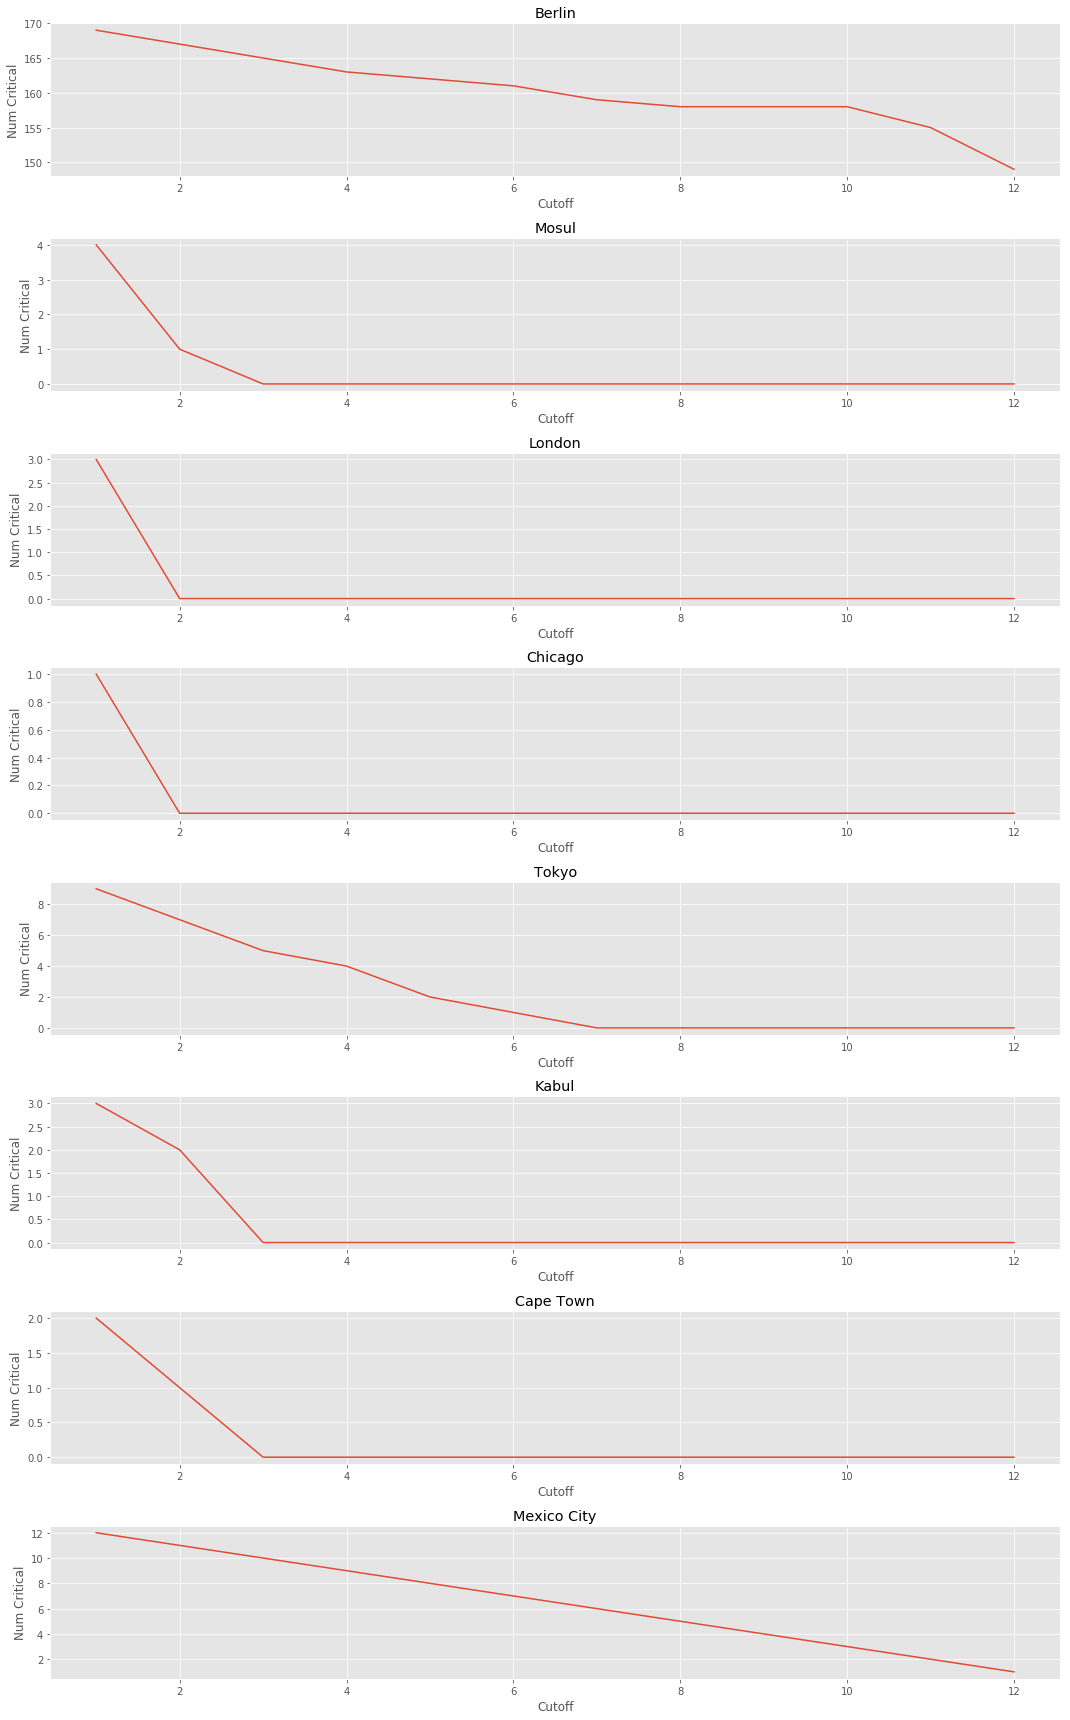

In [75]:
fig, axes = plt.subplots(8, figsize=(15,24))
cities = ["Berlin", "Mosul", "London", "Chicago", "Tokyo", "Kabul", "Cape Town", "Mexico City"]

for i, ax in enumerate(axes.flatten()):
    city_df = df[df["city"] == cities[i]]
    city_df = city_df.set_index("start_ts")
    plot_cutoffs_to_critical_reports(ax, city_df, cutoffs=xrange(1, 13))

plt.tight_layout()